<h1><center>Statistical Analysis of Language Corpora</center></h1>
<h2>
Name: Ayushman Anupam
</h2>

In [202]:
# importing needed libraries

import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LinearRegression
import os
import json
from indicnlp.tokenize.indic_tokenize import trivial_tokenize

from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    root_mean_squared_error
)

current_dir = "Resource/"


In [203]:
# english_text_path = os.path.join(current_dir, "english_corpus.txt")
# with open(english_text_path, "r", encoding="utf-8") as file:
#     text = file.read()

# pattern = re.compile(
#     r"(==.*?==+)"      
#     r"|http[s]?://\S+" 
#     r"|<.*?>"          
#     r"|\d+"            
#     r"|[^a-zA-Z\s]"    
# )

# text = pattern.sub(" ", text)
# text = re.sub(r"\s+", " ", text).strip().lower()

# symbols = {
#     '==', '|', '।', '.', ',', ':', ';', '!', '?', "''", '``', '` `', '|-', '===',
#     "'", 'st', 'nd', 'rd', 'th', "-", "_", "||", '...', '"', 'mm'
# }
# english_tokens = [
#     t for t in text.split()
#     if (len(t) > 1 or t in ('a', 'i')) and t not in symbols
# ]

# output_path = os.path.join(current_dir, "english_tokens.txt")
# with open(output_path, "w", encoding="utf-8") as file:
#     json.dump(english_tokens, file, indent=4)
# len(english_tokens)
# # 111494929


In [204]:
# marathi_text_path = os.path.join(current_dir, "marathi_corpus.txt")
# with open(marathi_text_path, "r", encoding="utf-8") as file:
#     marathi_text = file.read()

# # Marathi (Devanagari only)
# tokens = trivial_tokenize(marathi_text)
# tokens = [t for t in tokens if re.match(r'^[\u0900-\u097F]+$', t)]

# symbols = {
#     '==', '|', '।', '.', ',', ':', ';', '!', '?', "''", '``', '` `', '|-', '===',
#     "'", 'st', 'nd', 'rd', 'th', "-", "_", "||", '...', '"', 'mm'
# }
# marathi_tokens = [t for t in tokens if t not in symbols]

# output_path = os.path.join(current_dir, "marathi_tokens.txt")
# with open(output_path, "w", encoding="utf-8") as file:
#     json.dump(marathi_tokens, file, indent=4, ensure_ascii=False)

# len(marathi_tokens)
# # 15462954


In [205]:
# gujarati_text_path = os.path.join(current_dir,"gujarati_corpus.txt")
# with open(gujarati_text_path, "r") as file:
#     gujarati_text = file.read()

# tokens = trivial_tokenize(gujarati_text)
# tokens = [t for t in tokens if re.match(r'^[\u0A80-\u0AFF]+$', t)]
# symbols = {
#     '==', '|', '।', '.', ',', ':', ';', '!', '?', "''", '``', '` `', '|-', '===',
#     "'", 'st', 'nd', 'rd', 'th', "-", "_", "||", '...', '"', 'mm'
# }
# gujarati_tokens = [t for t in tokens if t not in symbols]

# output_path = os.path.join(current_dir, "gujarati_tokens.txt")
# with open(output_path, "w", encoding="utf-8") as file:
#     json.dump(gujarati_tokens, file, indent=4)
# len(gujarati_tokens)
# # 7117803

In [206]:
english_token_path = os.path.join(current_dir, "english_tokens.txt")
with open(english_token_path, "r", encoding="utf-8") as file:
     english_tokens = json.load(file)
print(len(english_tokens))

marathi_token_path = os.path.join(current_dir, "marathi_tokens.txt")
with open(marathi_token_path, "r", encoding="utf-8") as file:
     marathi_tokens = json.load(file)
print(len(marathi_tokens))

gujarati_token_path = os.path.join(current_dir, "gujarati_tokens.txt")
with open(gujarati_token_path, "r", encoding="utf-8") as file:
     gujarati_tokens = json.load(file)
print(len(gujarati_tokens))

111494929
15462954
7117803


In [207]:
# stop words for each language

import stopwordsiso as sw
english_stopwords = sw.stopwords("en")
marathi_stopwords   = sw.stopwords("mr")
gujarati_stopwords = sw.stopwords("gu")

In [208]:
# Making Dataframe for each language to store token, its frequency, normlaized frequency and rank

english_token_freq = Counter(english_tokens).most_common()
english_df = pd.DataFrame(english_token_freq, columns=["token", "frequency"])
english_df["rank"] = np.arange(1, len(english_df) + 1)

marathi_token_freq = Counter(marathi_tokens).most_common()
marathi_df = pd.DataFrame(marathi_token_freq, columns=["token", "frequency"])
marathi_df["rank"] = np.arange(1, len(marathi_df) + 1)

gujarati_token_freq = Counter(gujarati_tokens).most_common()
gujarati_df = pd.DataFrame(gujarati_token_freq, columns=["token", "frequency"])
gujarati_df["rank"] = np.arange(1, len(gujarati_df) + 1)

In [209]:
# vocab size
vocab_sizes = {
    "english": len(english_df),
#     "english": 1033520
    "marathi": len(marathi_df),
#     "marathi": 637846
    "gujarati": len(gujarati_df)
#     "gujarati": 369567
}

# number of document (Page counts) 
# Already run but took too long
page_counts = {
    "english": 348043,  
    "marathi": 182961,
    "gujarati": 34927
}
vocab_sizes

{'english': 1033520, 'marathi': 637846, 'gujarati': 369567}

## Task 1: Zipf’s Law Analysis

In [210]:
# curve_fit to get variable values by optimization
from scipy.optimize import curve_fit

# defining Zipfs law
def zipf_law(r, alpha, C):
    return C / (r**alpha)

# ----- Fitting English Corpus to Zipfs law -----
english_zipf_param, _ = curve_fit(zipf_law, english_df["rank"], english_df["frequency"], bounds=([0,0], [5,np.inf]))
english_alpha_z,english_C_z = english_zipf_param
print("English Zipf Law Parameters:",english_alpha_z,english_C_z)
# putting a new column for zipf prediction
english_df["zipf_prediction"] = zipf_law(english_df["rank"], english_alpha_z, english_C_z)

# ----- Fitting marathi Corpus to Zipfs law -----
marathi_zipf_param, _ = curve_fit(zipf_law, marathi_df["rank"], marathi_df["frequency"], bounds=([0,0], [5,np.inf]))
marathi_alpha_z,marathi_C_z = marathi_zipf_param
print("marathi Zipf Law Parameters:",marathi_alpha_z,marathi_C_z)
# putting a new column for zipf prediction
marathi_df["zipf_prediction"] = zipf_law(marathi_df["rank"], marathi_alpha_z, marathi_C_z)

# ----- Fitting gujarati Corpus to Zipfs law -----
gujarati_zipf_param, _ = curve_fit(zipf_law, gujarati_df["rank"], gujarati_df["frequency"], bounds=([0,0], [5,np.inf]))
gujarati_alpha_z,gujarati_C_z = gujarati_zipf_param
print("gujarati Zipf Law Parameters:",gujarati_alpha_z,gujarati_C_z)
# putting a new column for zipf prediction
gujarati_df["zipf_prediction"] = zipf_law(gujarati_df["rank"], gujarati_alpha_z, gujarati_C_z)




# Definig Mandelbrot Approximation
def mandelbrot_approx(r, alpha, beta, C):
    return C / ((r + beta) ** alpha)

# ----- Fitting English Corpus to Mandelbrot Approximation -----
english_mandelbrot_param, _ = curve_fit(mandelbrot_approx, english_df["rank"], english_df["frequency"], bounds=([0,0,0], [5,np.inf,np.inf]))
english_alpha_m, english_beta_m, english_C_m = english_mandelbrot_param
print("\nenglish mandelbrot Approx Parameters:",english_alpha_m, english_beta_m, english_C_m)
# putting a new column for mandelbrot prediction
english_df["mandelbrot_prediction"] = mandelbrot_approx(english_df["rank"], english_alpha_m, english_beta_m, english_C_m)

# ----- Fitting marathi Corpus to Mandelbrot Approximation -----
marathi_mandelbrot_param, _ = curve_fit(mandelbrot_approx, marathi_df["rank"], marathi_df["frequency"], bounds=([0,0,0], [5,np.inf,np.inf]))
marathi_alpha_m, marathi_beta_m, marathi_C_m = marathi_mandelbrot_param
print("marathi mandelbrot Approx Parameters:",marathi_alpha_m, marathi_beta_m, marathi_C_m)
# putting a new column for mandelbrot prediction
marathi_df["mandelbrot_prediction"] = mandelbrot_approx(marathi_df["rank"], marathi_alpha_m, marathi_beta_m, marathi_C_m)

# ----- Fitting gujarati Corpus to Mandelbrot Approximation -----
gujarati_mandelbrot_param, _ = curve_fit(mandelbrot_approx, gujarati_df["rank"], gujarati_df["frequency"], bounds=([0,0,0], [5,np.inf,np.inf]))
gujarati_alpha_m, gujarati_beta_m, gujarati_C_m = gujarati_mandelbrot_param
print("gujarati mandelbrot Approx Parameters:",gujarati_alpha_m, gujarati_beta_m, gujarati_C_m)
# putting a new column for mandelbrot prediction
gujarati_df["mandelbrot_prediction"] = mandelbrot_approx(gujarati_df["rank"], gujarati_alpha_m, gujarati_beta_m, gujarati_C_m)

English Zipf Law Parameters: 0.9344074645888714 7992307.993012839
marathi Zipf Law Parameters: 0.7120881806726215 346843.048614948
gujarati Zipf Law Parameters: 0.8298161645560912 308454.7176983304

english mandelbrot Approx Parameters: 1.0510017553962618 0.44437806996871065 11360167.980235076
marathi mandelbrot Approx Parameters: 0.8097062121907882 1.351691321773438 579124.2022602207
gujarati mandelbrot Approx Parameters: 0.8298159471859076 3.968862394102873e-29 308454.6478561056


In [211]:
def plot_zipf_mandelbrot(df, lang_name, alpha_zipf, alpha_mandelbrot, beta_mandelbrot):
    plt.figure(figsize=(14,6))

    plt.scatter(np.log10(df["rank"]), np.log10(df["frequency"]), label="Empirical Data", color="blue", s=10)
    plt.plot(np.log10(df["rank"]), np.log10(df["frequency"]), color="blue", alpha=0.5)

    plt.scatter(np.log10(df["rank"]), np.log10(df["zipf_prediction"]),
                label=f"Zipf fit (Alpha={alpha_zipf:.4f})", color="red", s=5)
    plt.plot(np.log10(df["rank"]), np.log10(df["zipf_prediction"]), color="red", alpha=0.5)

    plt.scatter(np.log10(df["rank"]), np.log10(df["mandelbrot_prediction"]),
                label=f"Mandelbrot fit (Alpha={alpha_mandelbrot:.4f}, Beta={beta_mandelbrot:.4f})",
                color="green", s=5)
    plt.plot(np.log10(df["rank"]), np.log10(df["mandelbrot_prediction"]), color="green", alpha=0.5)

    plt.xlabel("log10(Rank)")
    plt.ylabel("log10(Frequency)")
    plt.title(f"Log-Log Plot: Zipf & Mandelbrot Approximation - {lang_name}")
    plt.legend()
    plt.show()


c:\Users\ayush\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


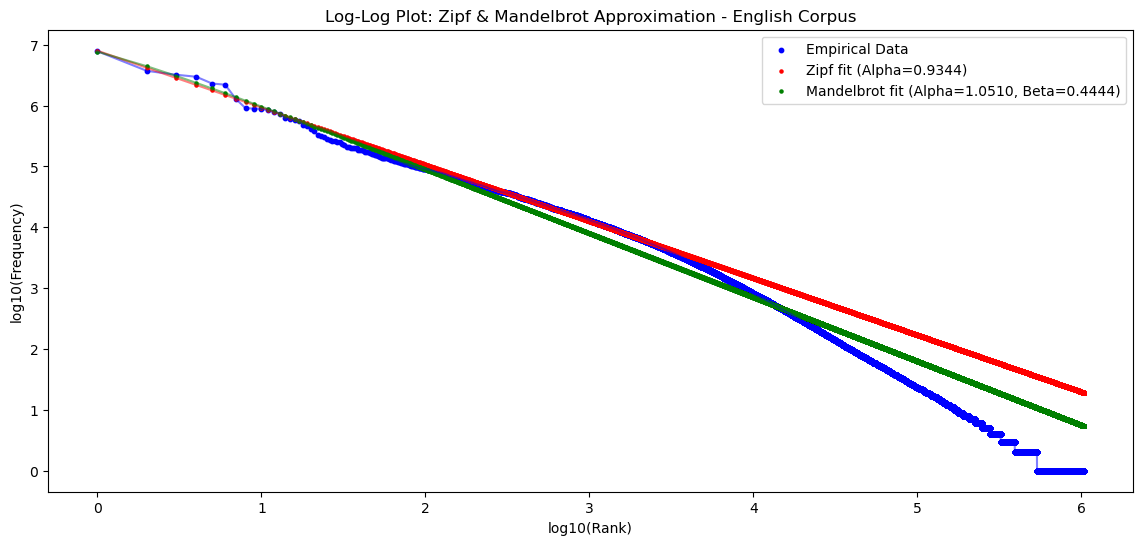

In [212]:
plot_zipf_mandelbrot(english_df, "English Corpus", english_alpha_z, english_alpha_m, english_beta_m)


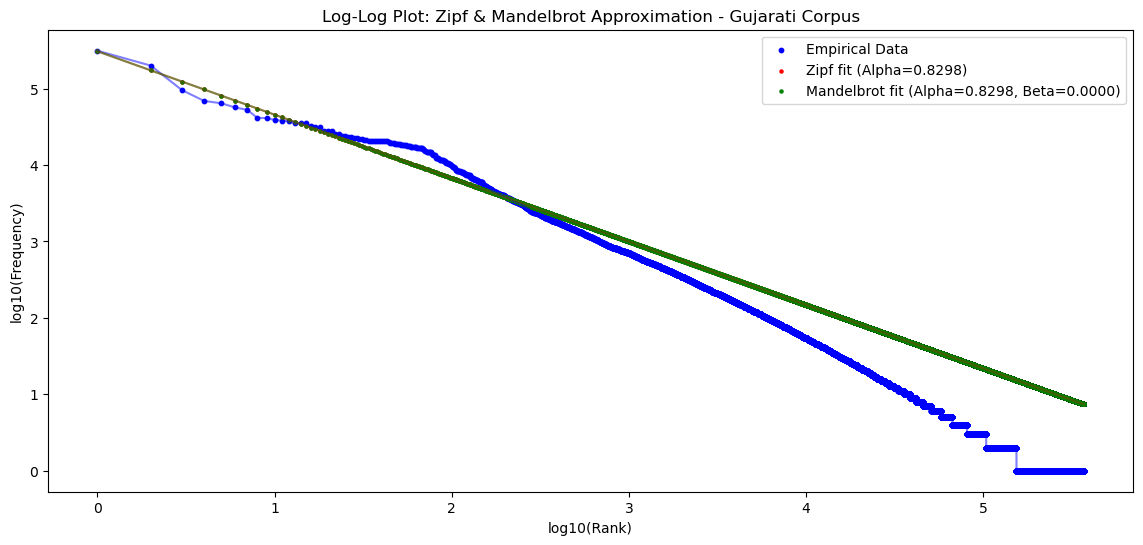

In [214]:
plot_zipf_mandelbrot(gujarati_df, "Gujarati Corpus", gujarati_alpha_z, gujarati_alpha_m, gujarati_beta_m)
# in my case it is too overlapping

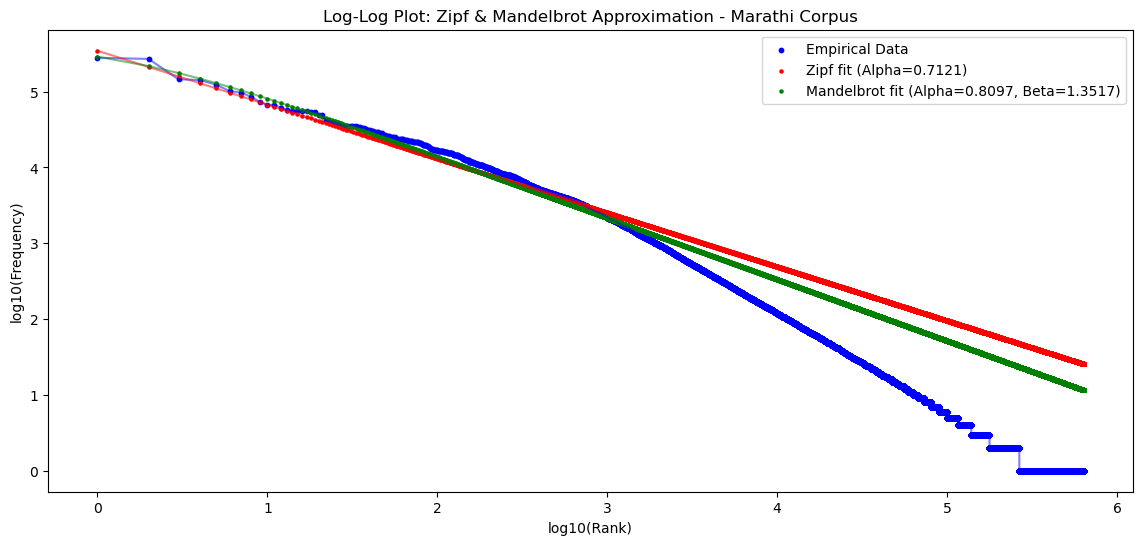

In [215]:
# Marathi
plot_zipf_mandelbrot(marathi_df, "Marathi Corpus", marathi_alpha_z, marathi_alpha_m, marathi_beta_m)

In [216]:
def compute_best_fit_and_metrics(df, alpha_zipf, alpha_mandelbrot, beta_mandelbrot, C_zipf, C_mandelbrot, lang_name):
 
    best_fit = {
        "Model": ["Zipf", "Mandelbrot"],
        "Alpha": [alpha_zipf, alpha_mandelbrot],
        "Beta": [None, beta_mandelbrot],
        "C": [C_zipf, C_mandelbrot]
    }
    df_param = pd.DataFrame(best_fit)
    
    print(f"\nBest Fit Parameters for {lang_name} Corpus:")
    print(df_param)
    
    metrics = {
        "Model": ["Zipf", "Mandelbrot"],
        "R2": [
            r2_score(df["frequency"], df["zipf_prediction"]),
            r2_score(df["frequency"], df["mandelbrot_prediction"]),
        ],
        "MSE": [
            mean_squared_error(df["frequency"], df["zipf_prediction"]),
            mean_squared_error(df["frequency"], df["mandelbrot_prediction"]),
        ],
        "RMSE": [
            np.sqrt(mean_squared_error(df["frequency"], df["zipf_prediction"])),
            np.sqrt(mean_squared_error(df["frequency"], df["mandelbrot_prediction"])),
        ],
        "MAE": [
            mean_absolute_error(df["frequency"], df["zipf_prediction"]),
            mean_absolute_error(df["frequency"], df["mandelbrot_prediction"]),
        ]
    }
    
    df_metrics = pd.DataFrame(metrics)
    print(f"\nBest Fit Metrics for {lang_name} Corpus:")
    print(df_metrics)
    return df_param, df_metrics


In [217]:
# English
english_df_param, english_df_metrics = compute_best_fit_and_metrics(
    english_df, english_alpha_z, english_alpha_m, english_beta_m, english_C_z, english_C_m, "English"
)
print("-"*50)
# Gujarati
gujarati_df_param, gujarati_df_metrics = compute_best_fit_and_metrics(
    gujarati_df, gujarati_alpha_z, gujarati_alpha_m, gujarati_beta_m, gujarati_C_z, gujarati_C_m, "Gujarati"
)

print("-"*50)
# Marathi
marathi_df_param, marathi_df_metrics = compute_best_fit_and_metrics(
    marathi_df, marathi_alpha_z, marathi_alpha_m, marathi_beta_m, marathi_C_z, marathi_C_m, "Marathi"
)



Best Fit Parameters for English Corpus:
        Model     Alpha      Beta             C
0        Zipf  0.934407       NaN  7.992308e+06
1  Mandelbrot  1.051002  0.444378  1.136017e+07

Best Fit Metrics for English Corpus:
        Model        R2           MSE         RMSE        MAE
0        Zipf  0.981457  2.087185e+06  1444.709190  76.786654
1  Mandelbrot  0.984506  1.744062e+06  1320.629355  36.793537
--------------------------------------------------

Best Fit Parameters for Gujarati Corpus:
        Model     Alpha          Beta              C
0        Zipf  0.829816           NaN  308454.717698
1  Mandelbrot  0.829816  3.968862e-29  308454.647856

Best Fit Metrics for Gujarati Corpus:
        Model        R2           MSE       RMSE        MAE
0        Zipf  0.970057  16984.532763  130.32472  22.812145
1  Mandelbrot  0.970057  16984.532763  130.32472  22.812202
--------------------------------------------------

Best Fit Parameters for Marathi Corpus:
        Model     Alpha     

### -------------- Stop word Analysis ---------------------

In [246]:
def stopword_analysis(df, stopwords_list, lang_name, top_percent=0.05):
    top_count = int(top_percent * len(df))
    top_tokens = df["token"].head(top_count)
    top_stop_words = [t for t in top_tokens if t in stopwords_list]
    top_stop_word_count = len(top_stop_words)
    top_stop_word_percent = (top_stop_word_count / top_count) * 100

    print("-"*25, f"{lang_name} Corpus", "-"*25)
    print(f"Top {int(top_percent*100)} percent words: {list(top_tokens)}")
    print(f"Stop words in top {int(top_percent*100)} percent words: {list(top_stop_words)}")
    print(f"Count of top {int(top_percent*100)} percent words: {top_count}")
    print(f"Count of stop words in top {int(top_percent*100)} percent words: {top_stop_word_count}")
    print(f"Percentage of stop words in top {int(top_percent*100)} percent words: {top_stop_word_percent:.2f} %")

    return {
        "top_tokens": list(top_tokens),
        "top_stop_words": list(top_stop_words),
        "top_count": top_count,
        "top_stop_word_count": top_stop_word_count,
        "top_stop_word_percent": top_stop_word_percent
    }


In [247]:
# Gujarati
gujarati_stopword_stats = stopword_analysis(gujarati_df, gujarati_stopwords, "Gujarati")

# English
english_stopword_stats = stopword_analysis(english_df, english_stopwords, "English")

# Marathi
marathi_stopword_stats = stopword_analysis(marathi_df, marathi_stopwords, "Marathi")


------------------------- Gujarati Corpus -------------------------
Top 5 percent words: ['છે', 'અને', 'આ', 'જ', 'એક', 'આવેલા', 'તેમ', 'ક્ષેત્રો', 'કે', 'ગામમાં', 'પણ', 'માટે', 'કરવામાં', 'આવે', 'ખેતી', 'ભાગમાં', 'તે', 'હતી', 'હતા', 'તા', 'પર', 'મુખ્ય', 'હતો', 'જે', 'હતું', 'સાથે', 'આવેલું', 'ગામ', 'ભારત', 'ગુજરાત', 'કરી', 'રાજ્યના', 'તરીકે', 'પ્રદેશો', 'દ્વારા', 'પશ્ચિમ', 'સ્વાયત્ત', 'દેશના', 'પરાધીન', 'અસ્વતંત્ર', 'પ્રદેશો\n', 'અલૅન્ડ', 'ગિબ્રાલ્ટર', 'મુખ્યત્વે', 'જેવી', 'અન્ય', 'પ્રાથમિક', 'શાળા', 'એ', 'સિટી', 'હોય', 'પશુપાલન', 'સ્વિટ્ઝર્લૅન્ડ', 'વૅટિકન', 'ગામના', 'ખેતમજૂરી', 'આંગણવાડી', 'કરે', 'વ્યવસાય', 'પંચાયતઘર', 'ડેરી', 'પ્રાપ્ય', 'દૂધની', 'સવલતો', 'લોકોનો', 'તાલુકામાં', 'સ્વિડન', 'સર્બિયા', 'જિલ્લામાં', 'થયેલી', 'સાન', 'થાય', 'મરીનો', 'પૉલૅન્ડ', 'પાકની', 'શાકભાજીના', 'કુલ', 'તેઓ', 'એવા', 'રીતે', 'બાજરી', 'તેમણે', 'નૉર્વે', 'માલ્ડોવા', 'તેના', 'અથવા', 'પૈકીના', 'તેમના', 'આવી', 'માં', 'તાલુકાઓ', 'કપાસ', 'લોકો', 'ના', 'વધુ', 'માલ્ટા', 'લિચેન્સ્ટેઇન', 'તેને', 'ઘઉં', 'તેની', 'સુધી'

### ------------ Max Deviation ---------------

In [244]:
def max_deviation_analysis(df, lang_name):
    print("-"*25, f"{lang_name} Corpus", "-"*25)

    res_zipf = df["frequency"] - df["zipf_prediction"]
    max_idx_zipf = np.argmax(np.abs(res_zipf))
    max_dev_zipf = res_zipf.iloc[max_idx_zipf]
    max_word_zipf = df.iloc[max_idx_zipf]

    print("Word with max deviation (Zipf):")
    print(f"Deviation = {max_dev_zipf:.2f}")
    print(max_word_zipf[["token", "frequency", "zipf_prediction"]])

    res_mandelbrot = df["frequency"] - df["mandelbrot_prediction"]
    max_idx_mandelbrot = np.argmax(np.abs(res_mandelbrot))
    max_dev_mandelbrot = res_mandelbrot.iloc[max_idx_mandelbrot]
    max_word_mandelbrot = df.iloc[max_idx_mandelbrot]

    print("\nWord with max deviation (Mandelbrot):")
    print(f"Deviation = {max_dev_mandelbrot:.2f}")
    print(max_word_mandelbrot[["token", "frequency", "mandelbrot_prediction"]])
    
    return {
        "zipf": {"token": max_word_zipf["token"], "deviation": max_dev_zipf, "frequency": max_word_zipf["frequency"], "prediction": max_word_zipf["zipf_prediction"]},
        "mandelbrot": {"token": max_word_mandelbrot["token"], "deviation": max_dev_mandelbrot, "frequency": max_word_mandelbrot["frequency"], "prediction": max_word_mandelbrot["mandelbrot_prediction"]}
    }


In [245]:
# English
english_deviation = max_deviation_analysis(english_df, "English")

# Gujarati
gujarati_deviation = max_deviation_analysis(gujarati_df, "Gujarati")

# Marathi
marathi_deviation = max_deviation_analysis(marathi_df, "Marathi")


------------------------- English Corpus -------------------------
Word with max deviation (Zipf):
Deviation = 796397.15
token                         and
frequency                 2984677
zipf_prediction    2188279.851193
Name: 3, dtype: object

Word with max deviation (Mandelbrot):
Deviation = -710011.45
token                                of
frequency                       3730358
mandelbrot_prediction    4440369.447661
Name: 1, dtype: object
------------------------- Gujarati Corpus -------------------------
Word with max deviation (Zipf):
Deviation = -28476.03
token                         જ
frequency                 69156
zipf_prediction    97632.026573
Name: 3, dtype: object

Word with max deviation (Mandelbrot):
Deviation = -28476.03
token                               જ
frequency                       69156
mandelbrot_prediction    97632.033886
Name: 3, dtype: object
------------------------- Marathi Corpus -------------------------
Word with max deviation (Zipf):
Deviation =

## Task 2: Heaps’ Law – Predicting Vocabulary Growth

In [224]:
# Function for prediction of vaiables by curve fit of Heaps law and its plotting

def heaps_law(N, k, beta):
    return k * (N ** beta)

def pred_and_plot_heap(tokens, lang_name, num_points=50):
    vocab_sizes = []
    token_counts = []

    token_seen = set()
    for i, token in enumerate(tokens, 1):
        token_seen.add(token)
        if i % (len(tokens) // num_points or 1) == 0:
            token_counts.append(i)
            vocab_sizes.append(len(token_seen))

    param, _ = curve_fit(heaps_law, token_counts, vocab_sizes,bounds=([0, 0.40], [100, 0.90]))
    k, beta = param
    predicted_vocab = heaps_law(np.array(token_counts), k, beta)

    plt.figure(figsize=(14, 6))
    plt.scatter(token_counts, vocab_sizes, label="Empirical (Observed)", s=16, alpha=.8)
    plt.scatter(token_counts, predicted_vocab, color="red", s=4, alpha=.8)
    plt.plot(token_counts, predicted_vocab, color="red",label=f"Heaps' fit (k={k:.4f}, β={beta:.4f})")
    plt.xlabel("Corpus Size (N tokens)")
    plt.ylabel("Vocabulary Size V")
    plt.title(f"Vocabulary Growth, Heaps law (Curve fit)- {lang_name}")
    plt.legend()
    plt.show()

    df_growth = pd.DataFrame({
        "tokens": token_counts,
        "vocab_size_observed": vocab_sizes,
        "vocab_size_predicted(optimized)": predicted_vocab
    })
    return df_growth, param

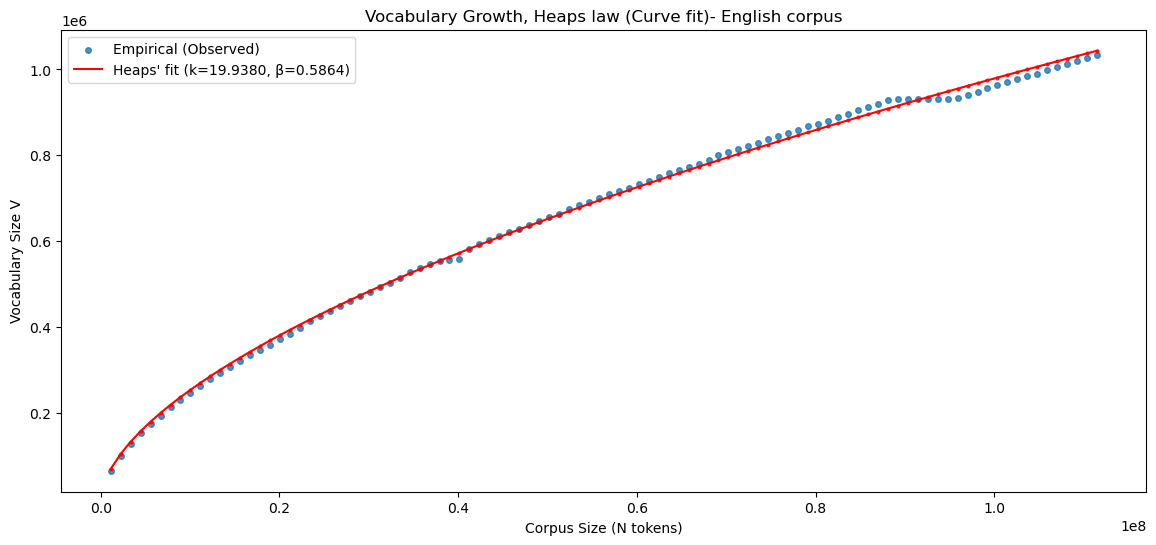

------------------------- English Corpus -------------------------
Estimated Parameters of Heap's Law: 
k_opt =  19.9380 
Beta_opt =  0.5864


,tokens,vocab_size_observed,vocab_size_predicted(optimized)
0,1114949,66056,70097.799584
1,2229898,100514,105250.456686
2,3344847,128391,133500.022116
3,4459796,153780,158031.474574
4,5574745,174619,180123.431548


In [225]:
# Prediction of vaiables of Heaps law  by curve fit and its plotting for English corpus
english_df_growth, (english_k_opt, english_beta_opt) = pred_and_plot_heap(tokens = english_tokens,
                                            lang_name="English corpus",
                                            num_points= 100)
print("-"*25, "English Corpus", "-"*25)
print(f"Estimated Parameters of Heap's Law: \nk_opt = {english_k_opt: .4f} \nBeta_opt = {english_beta_opt: .4f}")
english_df_growth.head()

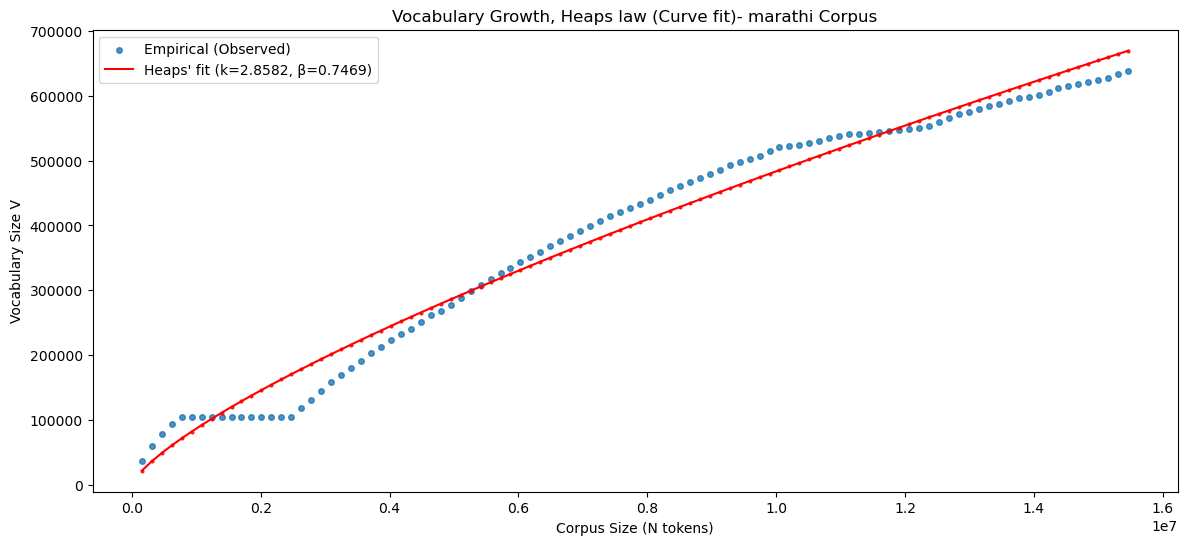

------------------------- marathi Corpus -------------------------
Estimated Parameters of Heap's Law: 
k_opt =  2.8582 
Beta_opt =  0.7469


,tokens,vocab_size_observed,vocab_size_predicted(optimized)
0,154629,36708,21478.972616
1,309258,60063,36045.869479
2,463887,77736,48795.485703
3,618516,94046,60491.939243
4,773145,103895,71462.871758


In [226]:
# Prediction of vaiables of Heaps law  by curve fit and its plotting for marathi corpus
marathi_df_growth, (marathi_k_opt, marathi_beta_opt) = pred_and_plot_heap(tokens = marathi_tokens,
                                            lang_name="marathi Corpus",
                                            num_points= 100)
print("-"*25, "marathi Corpus", "-"*25)
print(f"Estimated Parameters of Heap's Law: \nk_opt = {marathi_k_opt: .4f} \nBeta_opt = {marathi_beta_opt: .4f}")
marathi_df_growth.head()

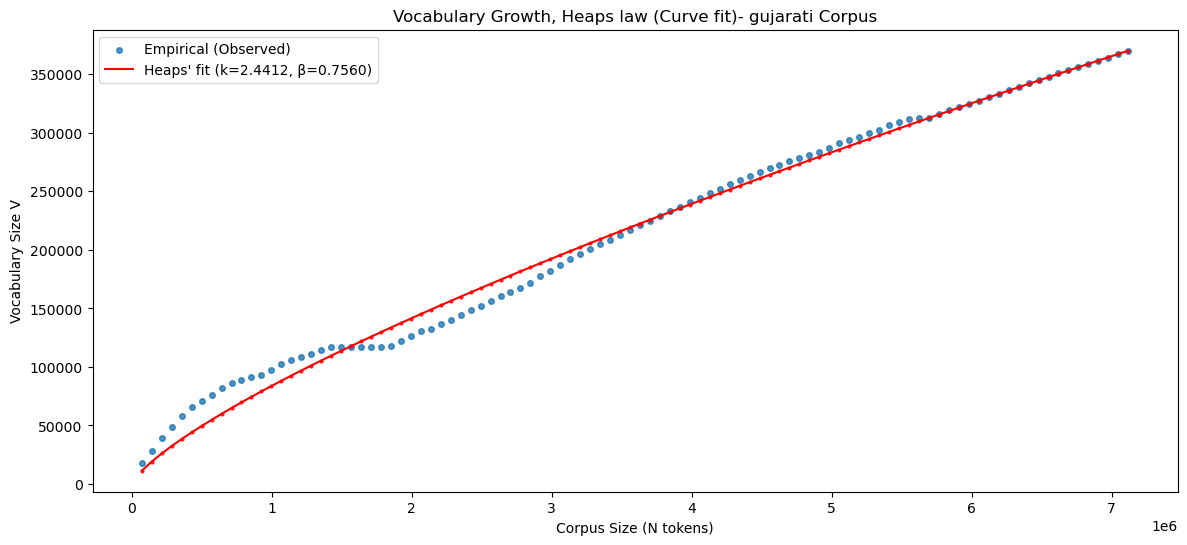

------------------------- gujarati Corpus -------------------------
Estimated Parameters of Heap's Law: 
k_opt =  2.4412 
Beta_opt =  0.7560


,tokens,vocab_size_observed,vocab_size_predicted(optimized)
0,71178,17636,11380.486893
1,142356,28283,19219.883945
2,213534,38977,26114.536887
3,284712,49061,32459.414285
4,355890,58206,38424.503778


In [227]:
# Prediction of vaiables of Heaps law  by curve fit and its plotting for gujarati corpus
gujarati_df_growth, (gujarati_k_opt, gujarati_beta_opt) = pred_and_plot_heap(tokens = gujarati_tokens,
                                            lang_name="gujarati Corpus",
                                            num_points= 100)
print("-"*25, "gujarati Corpus", "-"*25)
print(f"Estimated Parameters of Heap's Law: \nk_opt = {gujarati_k_opt: .4f} \nBeta_opt = {gujarati_beta_opt: .4f}")
gujarati_df_growth.head()

## Task 3: Computational Scaling – Vocabulary–Document Incidence Matrix

In [228]:
memory_requirements = []

for language in vocab_sizes:
    V = vocab_sizes[language]
    D = page_counts[language]
    bytes_req = V * D * 8
    gb_req = bytes_req / (1024**3)
    
    handle = "Yes" if gb_req < 16 else "No" 
    memory_requirements.append({
        "Language": language,
        "Vocabulary size (V)": V,
        "Number of documents (D)": D,
        "Memory (GB)": round(gb_req, 2),
        "System able to handle?": handle
    })

# Create table
memory_requirements_table = pd.DataFrame(memory_requirements)
memory_requirements_table

,Language,Vocabulary size (V),Number of documents (D),Memory (GB),System able to handle?
0,english,1033520,348043,2680.04,No
1,marathi,637846,182961,869.49,No
2,gujarati,369567,34927,96.17,No


## Task 4: Regression Fitting of Heaps’ Law

In [229]:
# Function for prediction of vaiables by Regression on log of Heaps law and its plotting

def  pred_and_plot_heap_regression(df_growth, lang_name="English"):
    token_counts = df_growth["tokens"].values
    vocab_sizes = df_growth["vocab_size_observed"].values

    X = np.log(token_counts).reshape(-1, 1)
    y = np.log(vocab_sizes)

    reg = LinearRegression()
    reg.fit(X, y)

    beta = reg.coef_[0]
    log_k = reg.intercept_
    k = np.exp(log_k)

    predicted_vocab_reg = heaps_law(token_counts, k, beta)
    df_growth = df_growth.copy()
    df_growth["vocab_size_predicted(regression)"] = predicted_vocab_reg


    plt.figure(figsize=(14, 6))
    plt.scatter(token_counts, vocab_sizes, label="Empirical (Observed)", s=16, alpha=.8)
    plt.scatter(token_counts, predicted_vocab_reg, color="green", s=5, alpha=.8)
    plt.plot(token_counts, predicted_vocab_reg, color="green", label=f"Regression fit (k={k:.4f}, β={beta:.4f})")
    plt.xlabel("Corpus Size (N tokens)")
    plt.ylabel("Vocabulary Size V")
    plt.title(f"Vocabulary Growth Comparison (Heaps Law) regression- {lang_name}")
    plt.legend()
    plt.show()

    return df_growth, (k, beta)


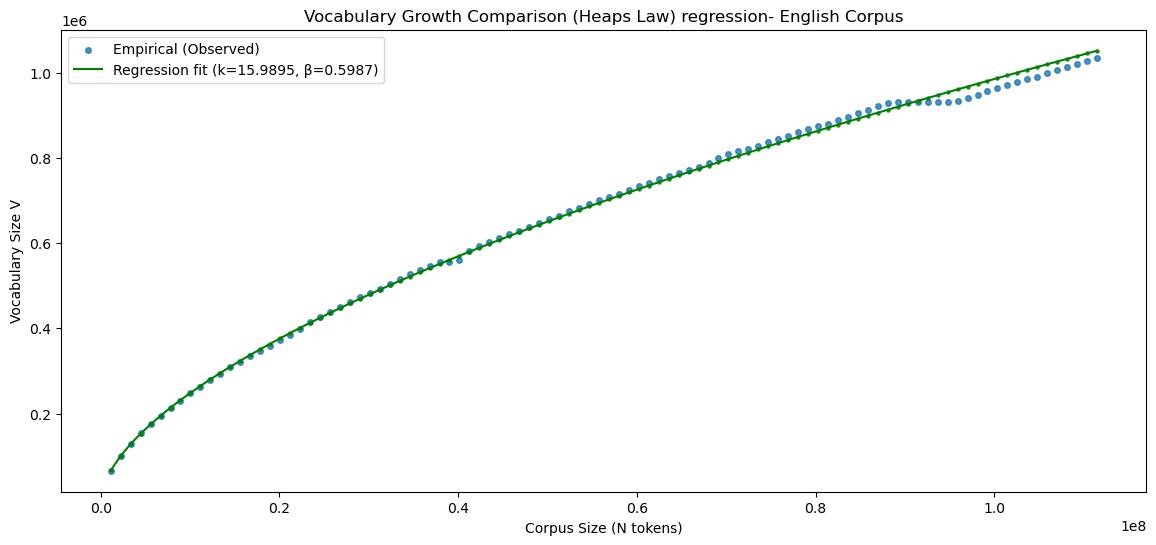

------------------------- English Corpus -------------------------
Estimated Parameters of Heap's Law: 
k_reg =  15.9895 
Beta_reg =  0.5987



,tokens,vocab_size_observed,vocab_size_predicted(optimized),vocab_size_predicted(regression)
0,1114949,66056,70097.799584,66730.754141
1,2229898,100514,105250.456686,101053.812819
2,3344847,128391,133500.022116,128818.592230
3,4459796,153780,158031.474574,153030.985739
4,5574745,174619,180123.431548,174903.864254


In [230]:
# Prediction of vaiables by Regression on log of Heaps law and its plotting for English corpus
english_df_growth, english_param = pred_and_plot_heap_regression(english_df_growth,"English Corpus")
english_k_reg,english_beta_reg = english_param
print("-"*25, "English Corpus", "-"*25)
print(f"Estimated Parameters of Heap's Law: \nk_reg = {english_k_reg: .4f} \nBeta_reg = {english_beta_reg: .4f}\n")
english_df_growth.head()

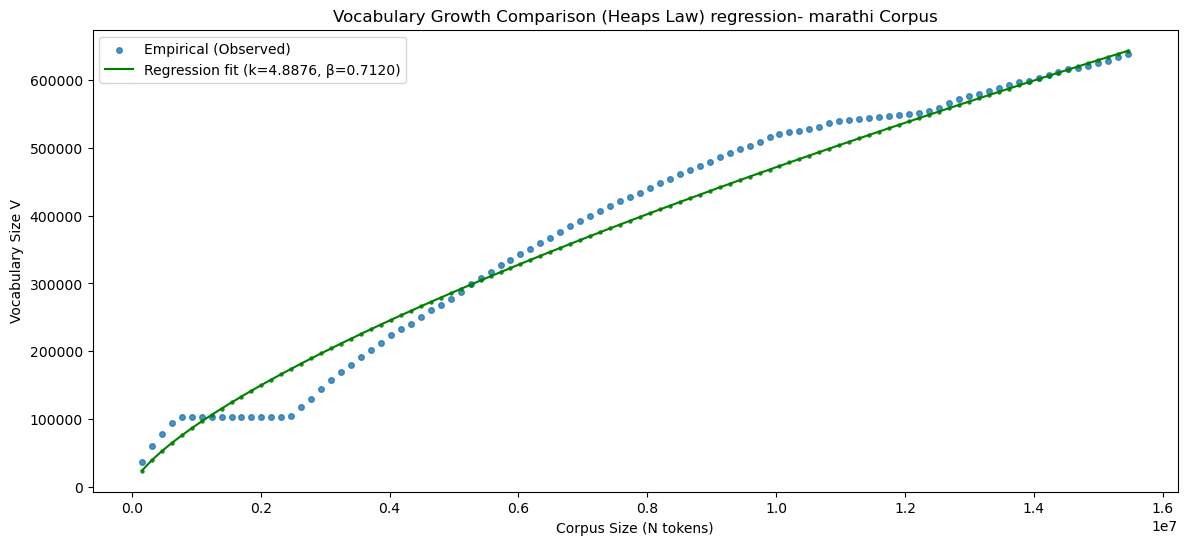

------------------------- marathi Corpus -------------------------
Estimated Parameters of Heap's Law: 
k_reg =  4.8876 
Beta_reg =  0.7120



,tokens,vocab_size_observed,vocab_size_predicted(optimized),vocab_size_predicted(regression)
0,154629,36708,21478.972616,24208.662834
1,309258,60063,36045.869479,39656.099462
2,463887,77736,48795.485703,52928.597435
3,618516,94046,60491.939243,64960.474495
4,773145,103895,71462.871758,76146.684180


In [231]:
# Prediction of vaiables by Regression on log of Heaps law and its plotting for marathi corpus
marathi_df_growth, marathi_param = pred_and_plot_heap_regression(marathi_df_growth,"marathi Corpus")
marathi_k_reg,marathi_beta_reg = marathi_param
print("-"*25, "marathi Corpus", "-"*25)
print(f"Estimated Parameters of Heap's Law: \nk_reg = {marathi_k_reg: .4f} \nBeta_reg = {marathi_beta_reg: .4f}\n")
marathi_df_growth.head()

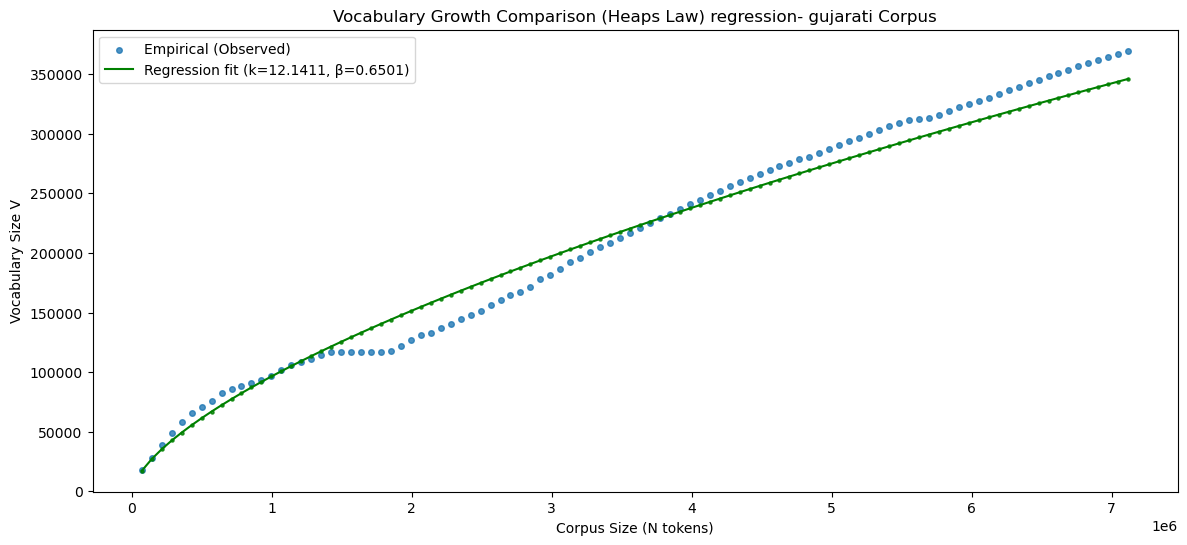

------------------------- gujarati Corpus -------------------------
Estimated Parameters of Heap's Law: 
k_reg =  12.1411 
Beta_reg =  0.6501



,tokens,vocab_size_observed,vocab_size_predicted(optimized),vocab_size_predicted(regression)
0,71178,17636,11380.486893,17329.768841
1,142356,28283,19219.883945,27195.306680
2,213534,38977,26114.536887,35397.437102
3,284712,49061,32459.414285,42677.124675
4,355890,58206,38424.503778,49339.740747


In [232]:
# Prediction of vaiables by Regression on log of Heaps law and its plotting for gujarati corpus
gujarati_df_growth, gujarati_param = pred_and_plot_heap_regression(gujarati_df_growth,"gujarati Corpus")
gujarati_k_reg,gujarati_beta_reg = gujarati_param
print("-"*25, "gujarati Corpus", "-"*25)
print(f"Estimated Parameters of Heap's Law: \nk_reg = {gujarati_k_reg: .4f} \nBeta_reg = {gujarati_beta_reg: .4f}\n")
gujarati_df_growth.head()

In [233]:
def compute_heap_fit_and_metrics(df_growth, k_opt, beta_opt, k_reg, beta_reg, lang_name):

    heap_best_fit = {
        "Model": ["Optimised fit", "Regression"],
        "k": [k_opt, k_reg],
        "Beta": [beta_opt, beta_reg]
    }
    df_param_heap = pd.DataFrame(heap_best_fit)
    print(f"\nBest Heap Fit Parameters for {lang_name} Corpus:")
    print(df_param_heap)

    # Metrics
    heap_metrics = {
        "Model": ["Optimised fit", "Regression"],
        "R2": [
            r2_score(df_growth["vocab_size_observed"], df_growth["vocab_size_predicted(optimized)"]),
            r2_score(df_growth["vocab_size_observed"], df_growth["vocab_size_predicted(regression)"]),
        ],
        "MSE": [
            mean_squared_error(df_growth["vocab_size_observed"], df_growth["vocab_size_predicted(optimized)"]),
            mean_squared_error(df_growth["vocab_size_observed"], df_growth["vocab_size_predicted(regression)"]),
        ],
        "RMSE": [
            np.sqrt(mean_squared_error(df_growth["vocab_size_observed"], df_growth["vocab_size_predicted(optimized)"])),
            np.sqrt(mean_squared_error(df_growth["vocab_size_observed"], df_growth["vocab_size_predicted(regression)"])),
        ],
        "MAE": [
            mean_absolute_error(df_growth["vocab_size_observed"], df_growth["vocab_size_predicted(optimized)"]),
            mean_absolute_error(df_growth["vocab_size_observed"], df_growth["vocab_size_predicted(regression)"]),
        ]
    }

    df_heap_metrics = pd.DataFrame(heap_metrics)
    print(f"\nBest Fit Metrics for {lang_name} Corpus:")
    print(df_heap_metrics)

    return df_param_heap, df_heap_metrics


In [234]:
# English
english_df_param_heap, english_df_heap_metrics = compute_heap_fit_and_metrics(
    english_df_growth, english_k_opt, english_beta_opt, english_k_reg, english_beta_reg, "English"
)
print("-"*50)
# Gujarati
gujarati_df_param_heap, gujarati_df_heap_metrics = compute_heap_fit_and_metrics(
    gujarati_df_growth, gujarati_k_opt, gujarati_beta_opt, gujarati_k_reg, gujarati_beta_reg, "Gujarati"
)
print("-"*50)
# Marathi
marathi_df_param_heap, marathi_df_heap_metrics = compute_heap_fit_and_metrics(
    marathi_df_growth, marathi_k_opt, marathi_beta_opt, marathi_k_reg, marathi_beta_reg, "Marathi"
)



Best Heap Fit Parameters for English Corpus:
           Model          k      Beta
0  Optimised fit  19.938026  0.586385
1     Regression  15.989475  0.598700

Best Fit Metrics for English Corpus:
           Model        R2           MSE          RMSE          MAE
0  Optimised fit  0.998515  1.008683e+08  10043.322449  8374.951913
1     Regression  0.998247  1.190583e+08  10911.386077  8230.276348
--------------------------------------------------

Best Heap Fit Parameters for Gujarati Corpus:
           Model          k      Beta
0  Optimised fit   2.441216  0.756037
1     Regression  12.141075  0.650105

Best Fit Metrics for Gujarati Corpus:
           Model        R2           MSE          RMSE           MAE
0  Optimised fit  0.989968  9.691703e+07   9844.644891   7404.141425
1     Regression  0.976557  2.264708e+08  15048.945664  12984.791412
--------------------------------------------------

Best Heap Fit Parameters for Marathi Corpus:
           Model         k      Beta
0  Opt

In [235]:
def plot_vocab_growth(df_growth, lang_name, df_param_heap):
    tokens = df_growth["tokens"]
    vocab_obs = df_growth["vocab_size_observed"]
    vocab_opt = df_growth["vocab_size_predicted(optimized)"]
    vocab_reg = df_growth["vocab_size_predicted(regression)"]

    k_opt = df_param_heap.loc[df_param_heap["Model"] == "Optimised fit", "k"].values[0]
    beta_opt = df_param_heap.loc[df_param_heap["Model"] == "Optimised fit", "Beta"].values[0]
    k_reg = df_param_heap.loc[df_param_heap["Model"] == "Regression", "k"].values[0]
    beta_reg = df_param_heap.loc[df_param_heap["Model"] == "Regression", "Beta"].values[0]


    plt.figure(figsize=(14, 6))


    plt.scatter(tokens, vocab_obs, label="Empirical (Observed)", s=16, alpha=.8, color="blue")

    plt.scatter(tokens, vocab_opt, color="red", s=5, alpha=.8)
    plt.plot(tokens, vocab_opt, color="red", label=f"Heaps' fit (Optimized), k = {k_opt:.4f}, Beta ={beta_opt:.4f}")

    plt.scatter(tokens, vocab_reg, color="green", s=5, alpha=.8)
    plt.plot(tokens, vocab_reg, color="green", label=f"Heaps' fit (Regression), k = {k_reg:.4f}, Beta ={beta_reg:.4f}")

    plt.xlabel("Corpus Size (N tokens)")
    plt.ylabel("Vocabulary Size V")
    plt.title(f"Vocabulary Growth Comparison, Heaps Law - {lang_name}")
    plt.legend()
    plt.show()

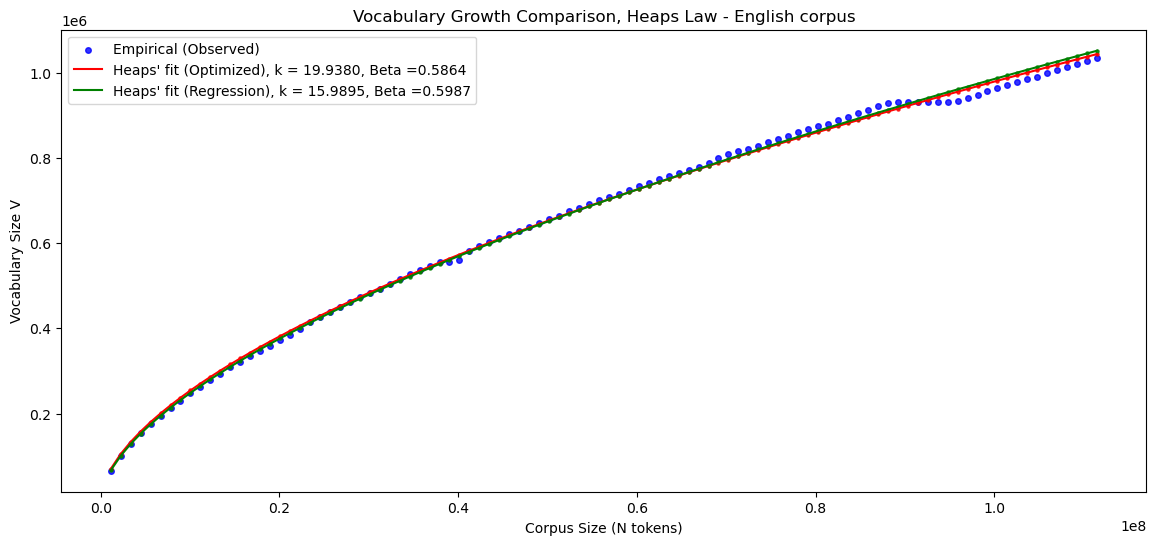

In [236]:
# plotting Heaps prediction using both regressiona and Curve for English corpus
plot_vocab_growth(english_df_growth, lang_name = "English corpus", df_param_heap = english_df_param_heap)

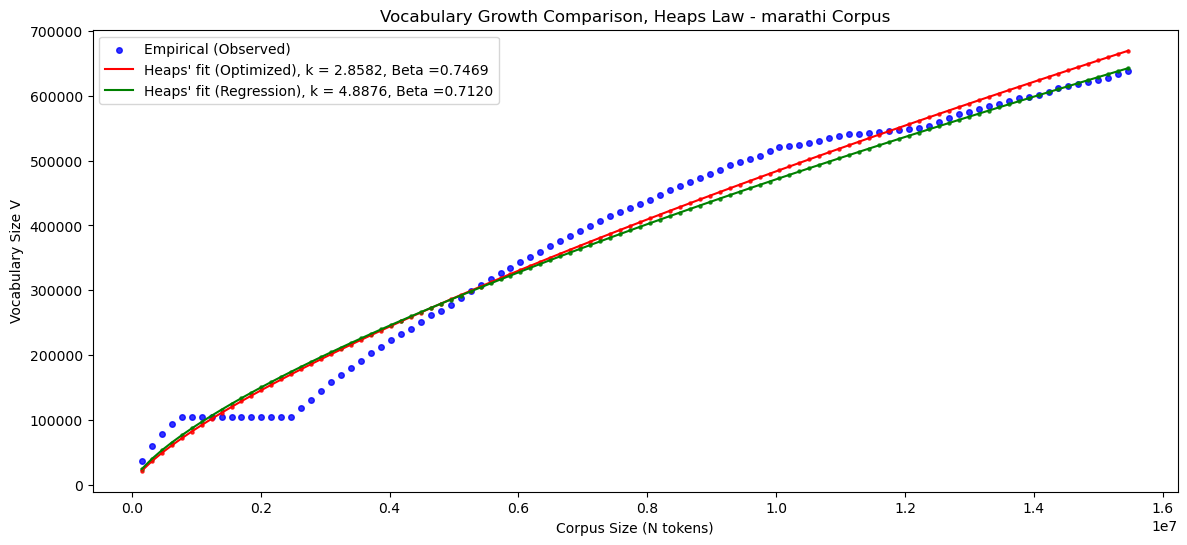

In [237]:
# plotting Heaps prediction using both regressiona and Curve for marathi corpus
plot_vocab_growth(marathi_df_growth, lang_name = "marathi Corpus", df_param_heap= marathi_df_param_heap)

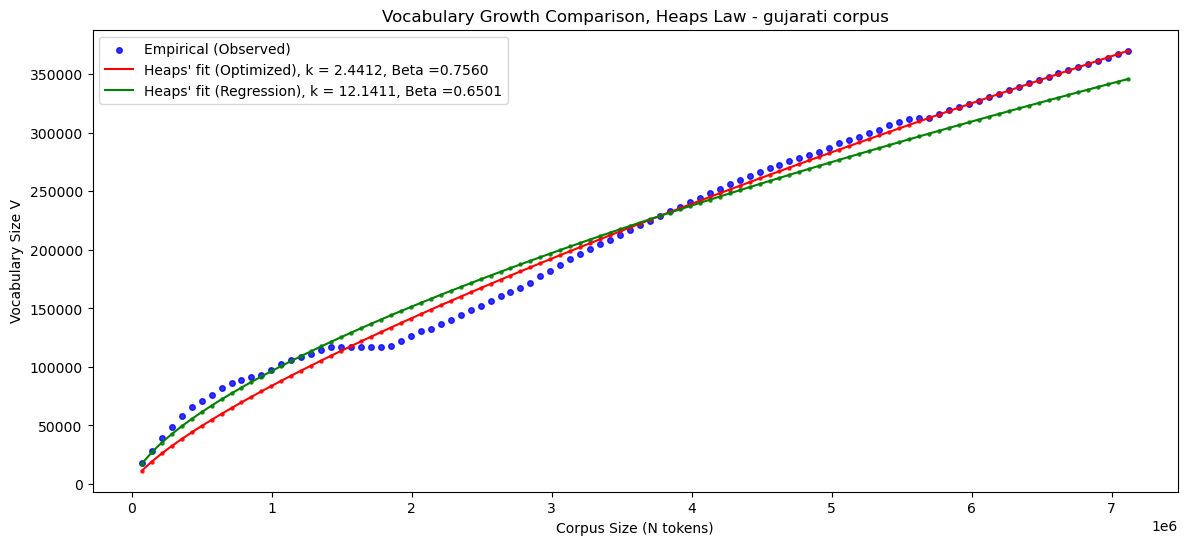

In [238]:
# plotting Heaps prediction using both regressiona and Curve for gujarati corpus
plot_vocab_growth(gujarati_df_growth, lang_name = "gujarati corpus", df_param_heap = gujarati_df_param_heap)

## Task 5: Comparative Analysis and Report

In [248]:
# --- Parameters ---
print(f"{'-'*48}")
print("\nZipf & Mandelbrot Parameters - English")
print(english_df_param)
print(f"{'-'*48}")

print("\nZipf & Mandelbrot Parameters - Marathi")
print(marathi_df_param)
print(f"{'-'*48}")

print("\nZipf & Mandelbrot Parameters - Gujarati")
print(gujarati_df_param)
print(f"{'-'*48}")

# --- Metrics ---
print(f"{'-'*60}")
print("\nZipf & Mandelbrot Metrics - English")
print(english_df_metrics)
print(f"{'-'*60}")

print("\nZipf & Mandelbrot Metrics - Marathi")
print(marathi_df_metrics)
print(f"{'-'*60}")

print("\nZipf & Mandelbrot Metrics - Gujarati")
print(gujarati_df_metrics)
print(f"{'-'*60}")

------------------------------------------------

Zipf & Mandelbrot Parameters - English
        Model     Alpha      Beta             C
0        Zipf  0.934407       NaN  7.992308e+06
1  Mandelbrot  1.051002  0.444378  1.136017e+07
------------------------------------------------

Zipf & Mandelbrot Parameters - Marathi
        Model     Alpha      Beta              C
0        Zipf  0.712088       NaN  346843.048615
1  Mandelbrot  0.809706  1.351691  579124.202260
------------------------------------------------

Zipf & Mandelbrot Parameters - Gujarati
        Model     Alpha          Beta              C
0        Zipf  0.829816           NaN  308454.717698
1  Mandelbrot  0.829816  3.968862e-29  308454.647856
------------------------------------------------
------------------------------------------------------------

Zipf & Mandelbrot Metrics - English
        Model        R2           MSE         RMSE        MAE
0        Zipf  0.981457  2.087185e+06  1444.709190  76.786654
1  Mandelbr

c:\Users\ayush\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


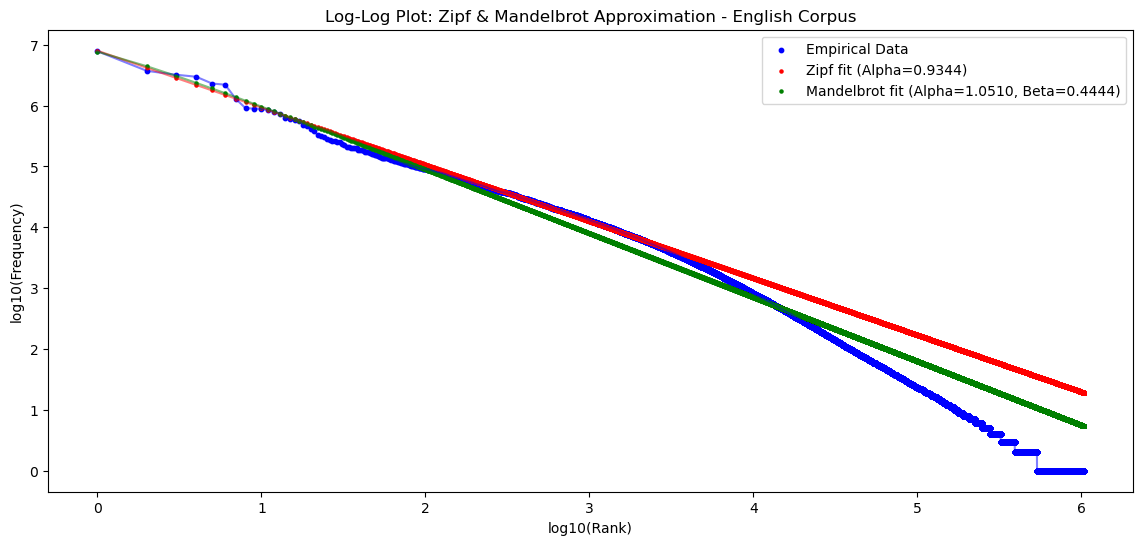

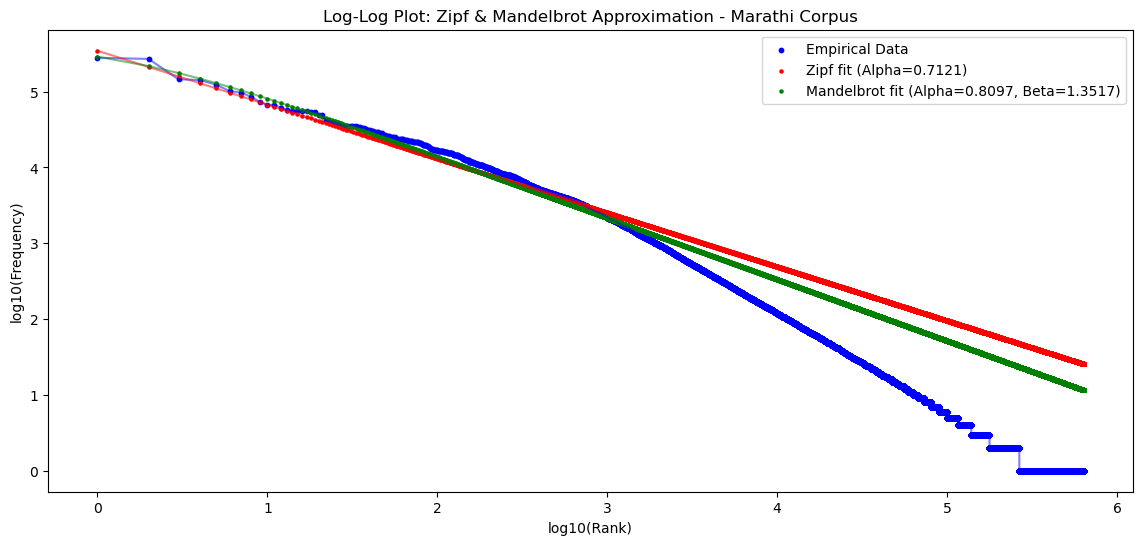

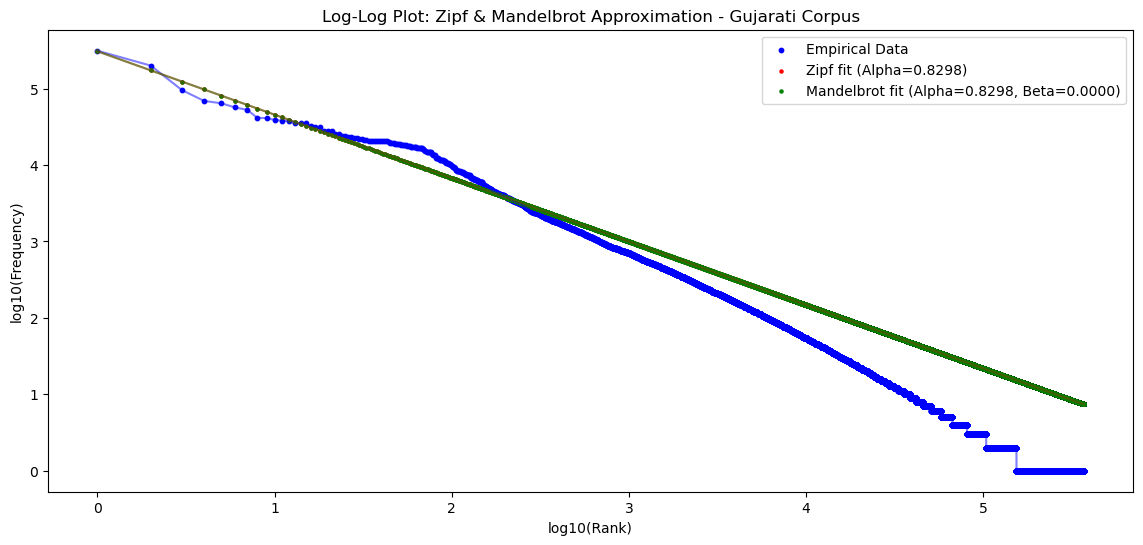

In [252]:
plot_zipf_mandelbrot(english_df, "English Corpus", english_alpha_z, english_alpha_m, english_beta_m)
plot_zipf_mandelbrot(marathi_df, "Marathi Corpus", marathi_alpha_z, marathi_alpha_m, marathi_beta_m)
plot_zipf_mandelbrot(gujarati_df, "Gujarati Corpus", gujarati_alpha_z, gujarati_alpha_m, gujarati_beta_m)

### ------- Zips law and Mandelbrot Approximation -----------

#### Zip's law - Alpha
**alpha** closer to 1 - distribution is highly skewed, few words dominate the corpus i.e, most frequent words are very frequent relative to others and distribution of words is skewed.<br>

For **English** Zip's law alpha value(0.93440) is **closer to 1** which suggests that few words dominate the corpus i.e, most frequent words are very frequent relative to others and distribution of words is skewed.<br>
For **Marathi** Zip's law alpha value(0.712088) is moderate which suggests **dominance by the top ranked words is less** i.e, frequencies are more evenly distributed across words. It also indicates flatter distribution, higher lexical diversity of tokens.<br>
For **Gujarati** Zip's law alpha value(0.829816) which lies between that of English and Marathi which suggests moderately spread i.e, more distributed than english but less than that of Gujarati.

#### Mandelbrot - Alpha and Beta

**alpha** closer to 1 - dustribution is highly skewed, few words dominate the corpus i.e, most frequent words are very frequent relative to others and distribution of words is skewed.<br>
**beta** grater tha 1 - mandelbrot accounts for these extreme frequencies by slightly "flattening" the top ranks.<br>


For **English**,  **aplha value(1.051002)** is almost 1 which again suggests that few words extremly dominate the corpus i.e, most frequent words are very frequent relative to others and distribution of words is highly skewed. **Beta vlaue(0.444378)** suggests that mandelbrot approximation slightly reduces dominance of the top-ranked words, smoothing the curve to fit mid-ranked words better. Simply, mandelbrot accounts for these extreme frequencies by slightly "flattening" the top ranks.

For **Marathi**, **alpha value(0.809706)** is moderate which suggests **dominance by the top ranked words is little less** i.e, frequencies are more evenly distributed across words. **Beta vlaue(1.351691)** which id larger than that of english suggests that mandelbrot approximation significantly reduces dominance of the top words. simply, top words are not overwhelmingly dominant.

For **Gujarati**, **alpha value(0.829816)** is moderate which suggests that **there is dominance by the top ranked words** i.e, frequencies are less evenly distributed across words. **Beta vlaue(amost 0)** which suggests that classical zipfs law fits well, top word is fully dominant(as observed in plot).

#### ----------- Evaluation Metrices -----------

For **English** R2 is 0.98 (in both cases) suggesting that model fits very well, it explains almost all variations in data. MSE is 2.09*10^6 and  1.74*10^6 both model better captures high-frequecy word but average deviation (RMSE and MAE) per word is slightly smaller for Mandelbrot suggesting that mandelbrot slightly improves the fit for top-ranked words.<br>
Mondelbrot fits better for english corpus.


For **Marathi**, R2 is 0.951 for Zipf and 0.977 for Mandelbrot, suggesting that Mandelbrot fits data sightly better. MSE is 28,714 for Zipf and 13,554 for Mandelbrot, which indicates that Zipf underestimates mid-ranked word frequencies while Mandelbrot works correctly for this. The average deviation per word (RMSE and MAE) is significantly smaller for Mandelbrot, reflecting better it better captures top and mid-ranked words.<br>
Mondelbrot fits better for Marathi corpus.


For **Gujarati**, R2 is 0.970 for both Zipf and Mandelbrot, suggesting that both models fit equally well. MSE, RMSE and MAE are all equal indicating that the classical Zipf law already captures the frequency distribution accurately. Mandelbrot does not provide significant improvement here, as top-ranked words are not overly dominant and the corpus is moderately skewed.<br>
Both Model fits similar for Gujarati corpus.

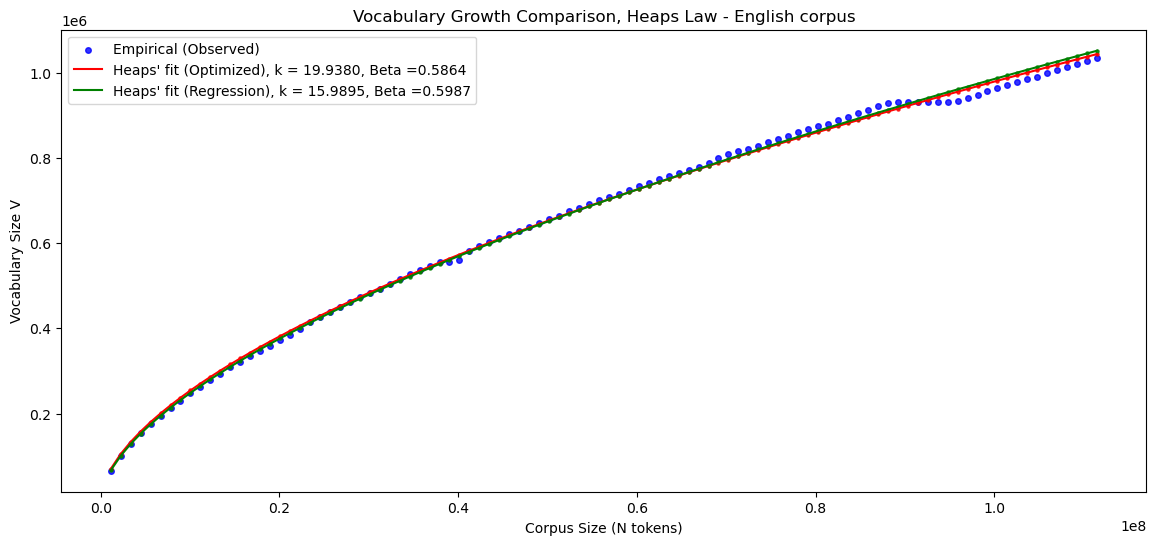

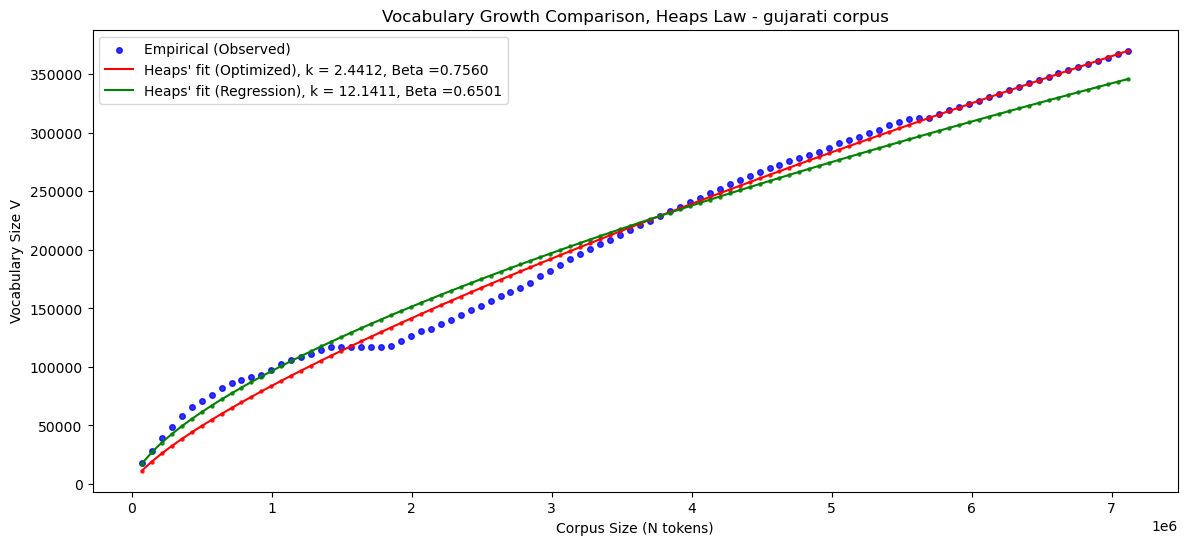

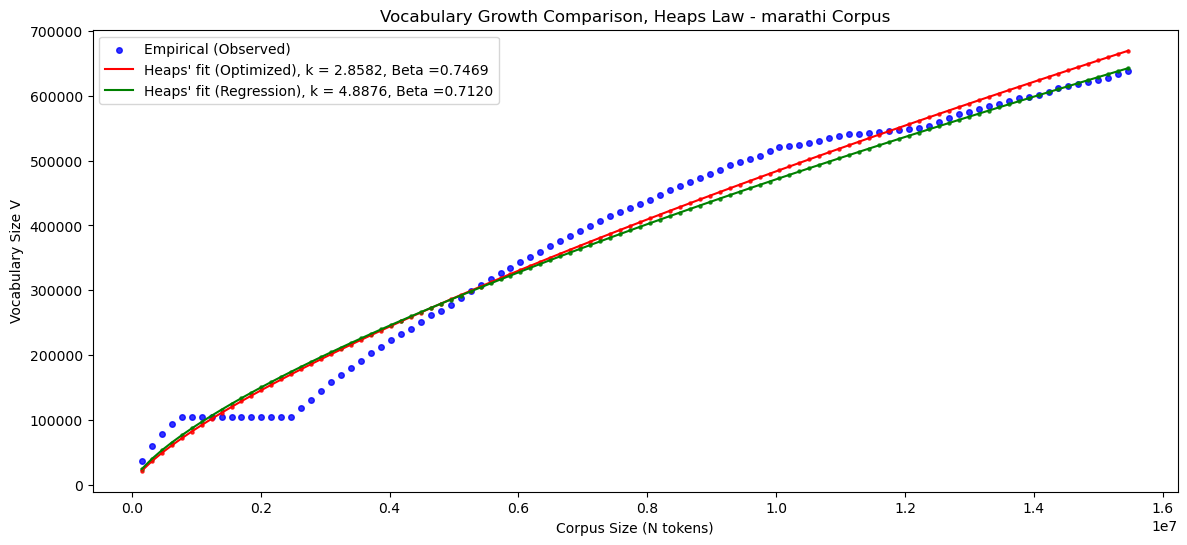

In [251]:
plot_vocab_growth(english_df_growth, lang_name = "English corpus", df_param_heap = english_df_param_heap)
plot_vocab_growth(gujarati_df_growth, lang_name = "gujarati corpus", df_param_heap = gujarati_df_param_heap)
plot_vocab_growth(marathi_df_growth, lang_name = "marathi Corpus", df_param_heap= marathi_df_param_heap)

In [249]:
# --- Heap Parameters ---
print(f"{'-'*42}")
print("\nHeap Parameters - English")
print(english_df_param_heap)
print(f"{'-'*42}")

print("\nHeap Parameters - Marathi")
print(marathi_df_param_heap)
print(f"{'-'*42}")

print("\nHeap Parameters - Gujarati")
print(gujarati_df_param_heap)
print(f"{'-'*42}")

# --- Heap Metrics ---
print(f"{'-'*70}")
print("\nHeap Metrics - English")
print(english_df_heap_metrics)
print(f"{'-'*70}")

print("\nHeap Metrics - Marathi")
print(marathi_df_heap_metrics)
print(f"{'-'*70}")

print("\nHeap Metrics - Gujarati")
print(gujarati_df_heap_metrics)
print(f"{'-'*70}")



------------------------------------------

Heap Parameters - English
           Model          k      Beta
0  Optimised fit  19.938026  0.586385
1     Regression  15.989475  0.598700
------------------------------------------

Heap Parameters - Marathi
           Model         k      Beta
0  Optimised fit  2.858154  0.746909
1     Regression  4.887593  0.712019
------------------------------------------

Heap Parameters - Gujarati
           Model          k      Beta
0  Optimised fit   2.441216  0.756037
1     Regression  12.141075  0.650105
------------------------------------------
----------------------------------------------------------------------

Heap Metrics - English
           Model        R2           MSE          RMSE          MAE
0  Optimised fit  0.998515  1.008683e+08  10043.322449  8374.951913
1     Regression  0.998247  1.190583e+08  10911.386077  8230.276348
----------------------------------------------------------------------

Heap Metrics - Marathi
           Mo

#### ------------- Heap Law  -------------

For **English**, **k** is 19.938 for Optimised fit and 15.989 for Regression, with Beta 0.586 and 0.599 respectively. This suggests that vocabulary grows relatively rapidly with corpus size. **Beta** less than 1 suggests that new words appear at a decreasing rate as the corpus grows. Optimised fit slightly better captures the empirical growth( which is true as english frequecy distribution is highly skewed).

For **Marathi**, k is 2.858 for Optimised fit and 4.888 for Regression, with Beta 0.747 and 0.712 respectively. Lower value of **k** compared to English suggets slower vocabulary growth. **Beta(closer to 0.7)**  shows that growth is close to linear.

For **Gujarati**, k is 2.441 for Optimised fit and 12.141 for Regression, with Beta 0.756 and 0.650 respectively.**k** of regression in is much greater than that of optimised fit(Regression overestimates k). **beta( >0.7)** for Optimised fit suggests sub-linear growth but initially fairly rapid. Optimised fit a more realistic model(since, regession overestimates k).



For **English**, **R2** is 0.9985 for Optimised fit and 0.9982 for Regression, indicating that both models explain nearly all the variance in vocabulary growth. **MSE,RMSE and MAE** are slightly lower for Optimised fit, suggesting that Optimised fit models the vocabulary growth slightly better.

For **Marathi**, **R2** is 0.978 for Optimised fit and 0.974 for Regression, indicating both model fit very good. **MSE, RMSE and MAE lower** are all smaller for Optimised fit, suggesting optimised fit captures the growth trend more accurately.

For **Gujarati**, **R2** is 0.990 for Optimised fit and 0.977 for Regression, again indicating that Optimised fit explains more variance. Again, **MSE, RMSE, and MAE** are all smaller for Optimised fit, suggesting Optimised fit better models the actual vocabulary growth in Gujarati.




In [250]:
memory_requirements_table

,Language,Vocabulary size (V),Number of documents (D),Memory (GB),System able to handle?
0,english,1033520,348043,2680.04,No
1,marathi,637846,182961,869.49,No
2,gujarati,369567,34927,96.17,No


 ### Memory requirements for vocabulary–document incidence matrices
 
 English corpus contains 348k documents (twice of Marathi and ten times more than Gujarati). English requires 2.68 TB, Marathi 869 GB, and Gujarati 96 GB These are big numbers, which is challenging for storing. Even Gujarati, the smallest corpus, exceeds typical RAM limits in most systems if stored.


None of the languages copuses can be handled in memory on personal systems.  For **English**, storing a vocabulary–document incidence matrix is impractical. Even **Marathi**, with moderate size, is challenging. Finally, **Gujarati** may fit into high-end systems(with more than 100 gb of RAM).

# -----------------------------------------------------------------------------

### Zipf & Mandelbrot Parameters

| Model      | English (Alpha, Beta, C)         |  Marathi (Alpha, Beta, C)         | Gujarati (Alpha, Beta, C)              |
| ---------- | -------------------------------- | --------------------------------- | ------------------------------------- |
| Zipf       | 0.934407, NaN, 7.992308e+06      | 0.712088, NaN, 346843.048615      | 0.829816, NaN, 308454.717698          |
| Mandelbrot | 1.051002, 0.444378, 1.136017e+07 | 0.809706, 1.351691, 579124.202260 | 0.829816, 3.968862e-29, 308454.647856 |

### Zipf & Mandelbrot Fit Metrics

| Model      | English (R², MSE, RMSE, MAE)                   | Marathi (R², MSE, RMSE, MAE)                 |  Gujarati (R², MSE, RMSE, MAE)                 |
| ---------- | ---------------------------------------------- | --------------------------------------------- | -------------------------------------------- |
| Zipf       | 0.981457, 2.087185e+06, 1444.709190, 76.786654 | 0.950980, 28713.544245, 169.450713, 66.280626 | 0.970057, 16984.532763, 130.32472, 22.812145 |
| Mandelbrot | 0.984506, 1.744062e+06, 1320.629355, 36.793537 | 0.976861, 13553.863037, 116.421059, 34.358797 | 0.970057, 16984.532763, 130.32472, 22.812202 |




### HEAP PARAMETERS (Param)

| Model         | English (k, Beta)   | Gujarati (k, Beta)  | Marathi (k, Beta)  |
| ------------- | ------------------- | ------------------- | ------------------ |
| Optimised fit | 19.938026, 0.586385 | 2.441216, 0.756037  | 2.858154, 0.746909 |
| Regression    | 15.989475, 0.598700 | 12.141075, 0.650105 | 4.887593, 0.712019 |

### HEAP METRICS (Matrices)

| Model         | English (R2, MSE, RMSE, MAE)                         | Gujarati (R2, MSE, RMSE, MAE)                         | Marathi (R2, MSE, RMSE, MAE)                       |
| ------------- | ---------------------------------------------------- | ----------------------------------------------------- | ----------------------------------------------------- |
| Optimised fit | 0.998515,  1.008683e+08,  10043.322449,  8374.951913 | 0.989968,  9.691703e+07,  9844.644891,  7404.141425   | 0.978427,  7.332704e+08,  27078.965811,  23660.893812 |
| Regression    | 0.998247,  1.190583e+08,  10911.386077,  8230.276348 | 0.976557,  2.264708e+08,  15048.945664,  12984.791412 | 0.973512,  9.003239e+08,  30005.397817,  24482.480423 |


### Computational Scaling – Vocabulary–Document Incidence Matrix

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Language</th>
      <th>Vocabulary size (V)</th>
      <th>Number of documents (D)</th>
      <th>Memory (GB)</th>
      <th>System able to handle?</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>english</td>
      <td>1033520</td>
      <td>348043</td>
      <td>2680.04</td>
      <td>No</td>
    </tr>
    <tr>
      <th>1</th>
      <td>marathi</td>
      <td>637846</td>
      <td>182961</td>
      <td>869.49</td>
      <td>No</td>
    </tr>
    <tr>
      <th>2</th>
      <td>gujarati</td>
      <td>369567</td>
      <td>34927</td>
      <td>96.17</td>
      <td>No</td>
    </tr>
  </tbody>
</table>
</div>